## 대표적인 이산형 확률분포
- 모집단의 확률분포에 어떤 가정을 하든, 확률분포를 모르면 이야기를 진행할 수 없다. 그러므로 다양한 확률분포에 대해 소개하고, 각각의 확률분포를 "어떤 상황에서 사용하는지" 설명하겠습니다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [2]:
# 그래프 선의 종류
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

## 6.1 베르누이 분포
- 베르누이분포(Bernoulli distribution)는 가장 기본적인 이산형 확률분포로, 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포. 
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 합니다. 
- 베르누이 분포 Bern(p) (p는 1이 나올 확률)

#### 베르누이분포의 확률함수(확률질량함수)
- $f(x) = p^{x}(1-p)^{(1-x)} \quad  (x\in{0,1})$

#### 베르누이분포의 기대값과 분산
- X ~ Bern(p)라고 할 때 

    $E(X) = p \\[2pt]  V(X) = p(1-p)$

In [3]:
# 확률함수 
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [4]:
p = 0.3
X = Bern(p)

In [5]:
check_prob(X)

expected value 0.3
variance 0.21


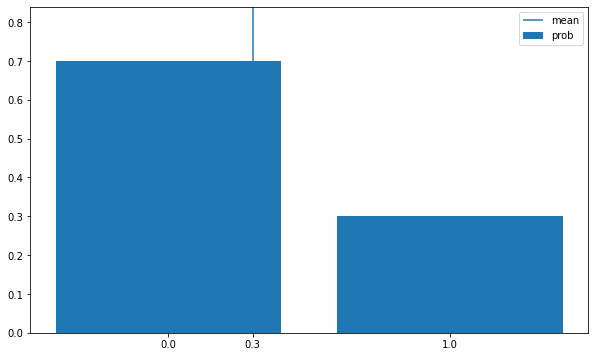

In [6]:
plot_prob(X)

In [7]:
# scipy.stats사용 
# bernoulli함수는 인수로 파라미터p를 취하고, 
# Bern(p)를 따르는 rv_frozen object를 반환합니다. 
# rv_frozen object는 scipy.stats의 확률변수에 해당하므로, 
# 이제부터 살펴보려는 다양한 메서드를 가지고 있습니다
rv = stats.bernoulli(p)
rv.pmf(0), rv.pmf(1) # pmf: 확률함수 계산 

(0.7000000000000001, 0.3)

In [8]:
rv.pmf([0, 1]) # pmf: 확률함수 계산 

array([0.7, 0.3])

In [9]:
rv.cdf([0, 1]) # cdf: 누적밀도 함수

array([0.7, 1. ])

In [10]:
rv.mean(), rv.var() # 평균, 분산

(0.3, 0.21)

## 6.2 이항분포
#### 표시: Bin(n,p)
- 이항분포(binomial distribution)는 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공횟수가 따르는 분포. 
- 성공하는 횟수는 0번부터 n번까지이므로 확률변수가 취할 수 있는 값은 {0,1,2,...n}입니다. 
- 이항분포의 파라미터: 성공확률 p (0<=p<=1), 시행횟수 n (n>=1)

#### 이항분포의 확률함수 
- $f(x) = {}_n C_xp^x(1-p)^{(n-x)}  \quad  (x\in \{0,1,...,n\})$

#### 이항분포의 기대값과 분산
- X ~ Bin(n,p)라고 할 때 

    $E(X) = np \\[2pt]  V(X) = np(1-p)$

In [11]:
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [12]:
n = 10
p = 0.3
X = Bin(n, p)

In [13]:
check_prob(X)

expected value 3.0
variance 2.1


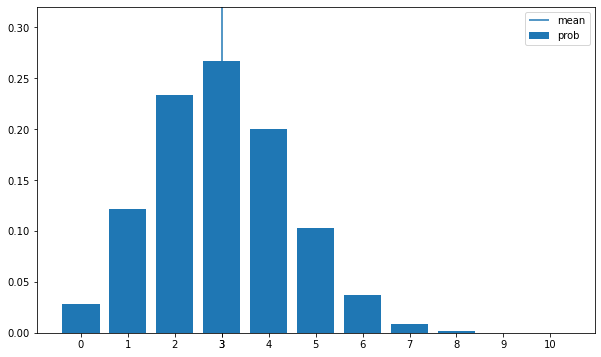

In [14]:
plot_prob(X)

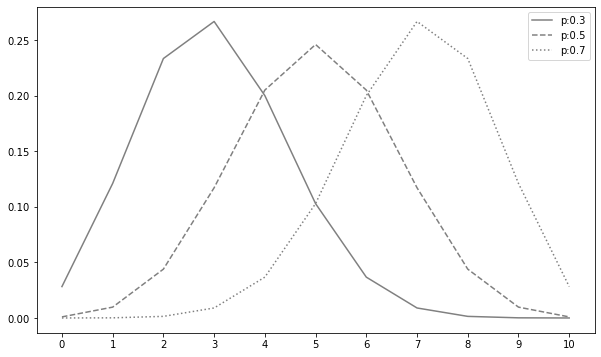

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
#     print('n:', n) #결과=10
    rv = stats.binom(n, p)
#     print(np.sum(rv.pmf(x_set))) # 결과=1 
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 6.3 기하분포
- 기하분포(geometric distribution)는 베루누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포.

#### 기하분포의 확률함수
- $f(x) = p(1-p)^{(1-x)} \quad  (x\in{0,1})$

#### 기하분포의 기대값과 분산
- X ~ Ge(p)라고 할 때 
    $E(X) = \frac{1}{p} \\[2pt]  V(X) = \frac{(1-p)}{p^2}$

In [16]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [17]:
p = 0.5
X = Ge(p)

In [18]:
check_prob(X)

expected value 2.0
variance 2.0


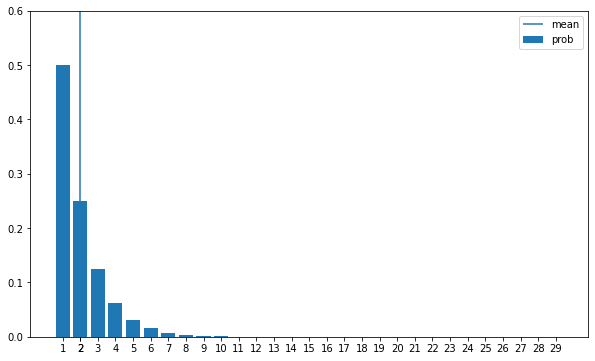

In [19]:
plot_prob(X)

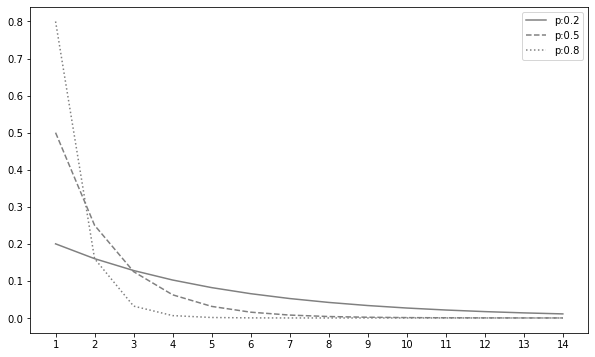

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

## 6.4 포아송 분포
- 포아송분포(Poisson distribution)는 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포임. 
- 발생하는 건수의 확률분포이므로, 확률변수가 취할 수 있는 값은 {0,1,2,...}가 됩니다. 포아송 분포의 파라미터는 $ \lambda$로 나타내고, $\lambda$는 양의 실수 입니다. 
- 표시: Poi($ \lambda$)

#### 포아송 분포의 확률함수
- $f(x) = \frac{\lambda^{x}}{x!}e^{-\lambda} \quad  (x\in{0,1,2,...})$
- $\lambda$:단위시간당 평균 발생횟수
- x: 확률변수로 지정한 발생횟수

#### 포아송 분포의 기댓값과 분산 
X ~ Poi($ \lambda$)라고 할때
$E(X) = \lambda \\[2pt]  V(X) = \lambda$

In [21]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [22]:
lam = 3
X = Poi(lam)

In [23]:
check_prob(X)

expected value 3.0
variance 3.0


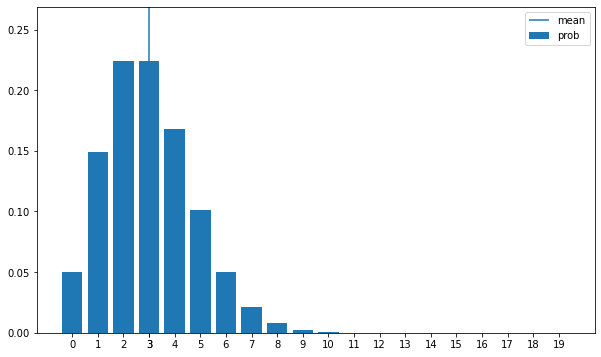

In [24]:
plot_prob(X)

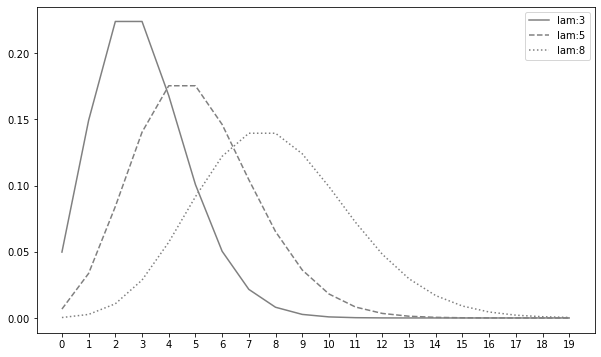

In [25]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()